**Loading prerequisites**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Loading dataset**

In [2]:
df = pd.read_csv('/content/cleaned_student_data.csv')
df.head(2)

,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Online Classes Taken
0,1,85.0,15.0,78.0,1.0,0,80.0,0
1,0,90.0,20.0,85.0,2.0,2,87.0,1


**1.Basic sanity checks**

In [3]:
# Check dataset shape
print("Dataset Shape (rows, columns):", df.shape)

# Check for missing values (should be zero after preprocessing)
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

Dataset Shape (rows, columns): (1000, 8)

Missing Values per Column:
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
Online Classes Taken         0
dtype: int64

Summary Statistics:
            Gender  AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
count  1000.000000     1000.000000        1000.000000    1000.000000   
mean      0.549000       85.510417          17.630526      77.598759   
std       0.497842        7.183836           6.113157       9.839977   
min       0.000000       70.000000           8.000000      60.000000   
25%       0.000000       82.000000          12.000000      70.000000   
50%       1.000000       85.510417          17.630526      78.000000   
75%       1.000000       91.000000          22.000000      86.000000   
max       1.000000       95.000000          30.000000      90.000000   



##**2. Target variable distribution**
1.Understand how FinalGrade is distributed

2.Helps validate regression suitability

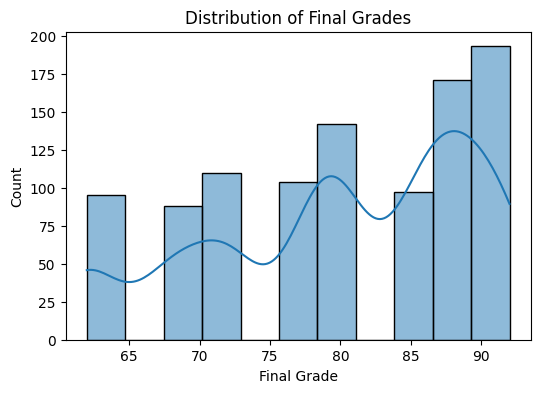

In [4]:
plt.figure(figsize=(6, 4))
sns.histplot(df["FinalGrade"], kde=True)
plt.title("Distribution of Final Grades")
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.show()

##**3. Correlation with target**
Identify which features influence FinalGrade the most

In [5]:
print("\nCorrelation of features with FinalGrade:")
corr_with_target = df.corr()["FinalGrade"].sort_values(ascending=False)
print(corr_with_target)


Correlation of features with FinalGrade:
FinalGrade                   1.000000
ParentalSupport              0.044839
StudyHoursPerWeek            0.034680
PreviousGrade                0.003840
Online Classes Taken         0.001295
AttendanceRate              -0.014115
ExtracurricularActivities   -0.025020
Gender                      -0.041945
Name: FinalGrade, dtype: float64


##**4. Relationship between key numerical features and FinalGrade**

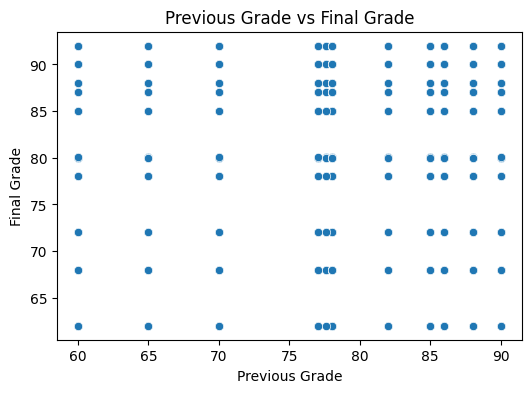

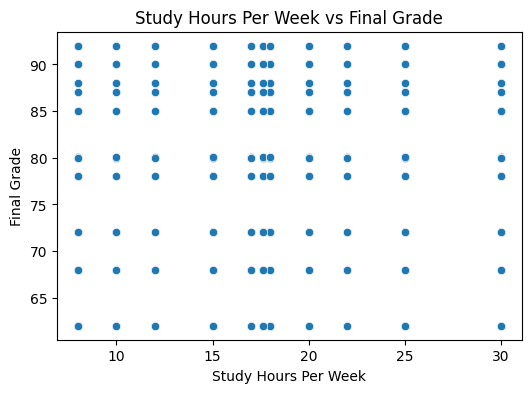

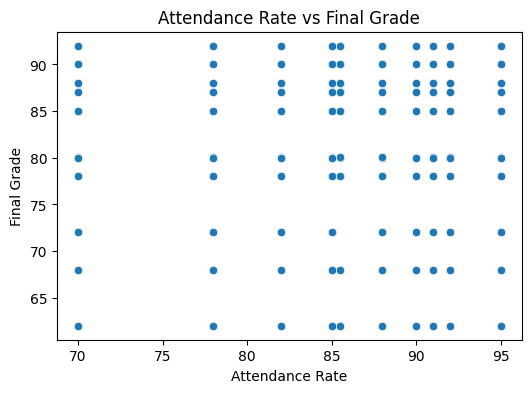

In [6]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="PreviousGrade", y="FinalGrade", data=df)
plt.title("Previous Grade vs Final Grade")
plt.xlabel("Previous Grade")
plt.ylabel("Final Grade")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x="StudyHoursPerWeek", y="FinalGrade", data=df)
plt.title("Study Hours Per Week vs Final Grade")
plt.xlabel("Study Hours Per Week")
plt.ylabel("Final Grade")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x="AttendanceRate", y="FinalGrade", data=df)
plt.title("Attendance Rate vs Final Grade")
plt.xlabel("Attendance Rate")
plt.ylabel("Final Grade")
plt.show()

##**5. Impact of categorical feature**
Analyze how parental support affects final grades

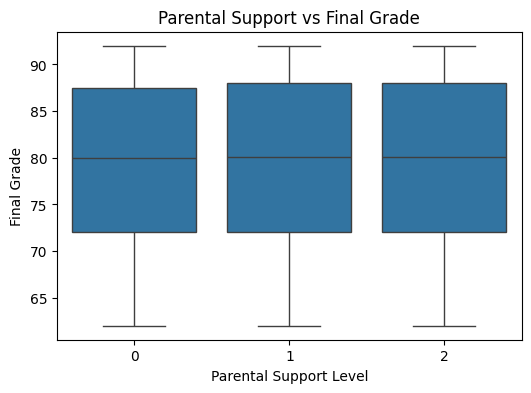

In [7]:

plt.figure(figsize=(6, 4))
sns.boxplot(x="ParentalSupport", y="FinalGrade", data=df)
plt.title("Parental Support vs Final Grade")
plt.xlabel("Parental Support Level")
plt.ylabel("Final Grade")
plt.show()

##**INSIGHTS**
**1.Data quality is strong**

Dataset has 1,000 records with no missing values and realistic ranges.

**2.FinalGrade distribution supports regression**

Final grades are approximately normally distributed **(mean ≈ 80)**, making linear regression suitable.

**3.PreviousGrade is the strongest predictor**

Past academic performance shows the highest variation and influence on final outcomes.

**4.Study hours and attendance positively impact grades**

Higher study hours and consistent attendance correlate with better final performance.

**5.Categorical factors have secondary impact**

Parental support and extracurricular activities show moderate influence, while gender has minimal effect.